# Problem set 3
## "The adventure of the missing phenotype"
### Zachary Miller

## Part 1: Sampling the data
We are asked to write a function that impliments reservoir sampling on the data file "w03-data.tbl". First, let's take a look at what the data file looks like to get a sense of how the data is structured.

In [1]:
! head -10 w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2019)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      F      M      M      F      M      F      F      M      F      M      M      M      F      M      F      F      F      F      M
anise             62.3   32.9   63.6   62.2   34.1   62.7   34.4   34.4   61.5   34.6   27.6   49.1   48.5   62.5   23.5   57.9   49.5   65.8   43.6   40.2
apricot           26.7   56.6   25.5   26.8   57.1   24.1   58.0   54.6   25.3   58.5   78.6   47.1   50.1   26.5   60.1   49.3   42.1   37.0   34.9   30.2
artichoke         58.4   30.2   55.5   56.9   28.4   56.9   29.6   26.9   60.8   30.7   29.0   31.7   48.3   48.7   65.7   38.5   28.0   34.4   65.1   13.4
arugula           50.1   22.0   50.2   47.1   20.2   50.5   22.7   24.2   51.0   19.5   12.7 

In [2]:
! tail -10 w03-data.tbl

AC007325.4        12.6   45.2   19.3   15.6   45.1   11.9   43.2   42.9   15.1   43.2   35.9    0.0   32.3   29.4    8.6   33.1   41.2   17.9   65.0   57.6
AC007325.2        66.6   33.0   68.6   66.3   37.2   63.6   39.8   38.8   65.3   38.1   55.5   41.8   75.2   48.1   76.2   56.1   82.0   20.4   51.8   78.1
BX072566.1        87.1   52.9   84.3   85.1   57.3   85.3   55.4   57.3   86.0   53.3   69.4   47.6   83.5   53.5   76.4   54.1   77.6   85.6   70.2   91.9
AL354822.1        37.7   70.4   39.1   42.3   68.2   39.4   71.9   69.1   40.0   72.6   63.2   56.3   53.5   64.7   31.2   67.9   36.6   64.5   83.5   37.3
AC023491.2        38.3   67.7   39.9   39.7   70.0   37.1   66.2   68.5   37.8   65.7   57.3   50.5   59.0   46.0   45.5   39.2   36.6   43.0   35.3   50.3
AC004556.1        69.2   31.5   66.3   65.1   39.3   63.8   40.1   34.1   68.4   37.4   56.2   40.1   53.9   34.7   39.7   32.2   51.1   35.5   48.2   61.5
AC233755.2        29.8   59.8   29.6   31.0   58.3   24.8   59.8

We can see that the file starts off with a few comments detailing where the data comes from, followed by two rows whose columns correspond to the sex and genotype of the mouse, and then a ton of rows whose columns represent the expression level for the gene associated with that row for each mouse. Oddly, the two rows containing the sex adn genotype information have a "#" in front of them, even though they are not really comments, so we will want to deal with them seperately later. 

For our resevoir sampling function, we are only really interested in the gene expression rows, so we can simply ignore the rows starting with a "#" as we impliment the reservoir sampling algorithm. In addition to a function that directly samples lines from the file, let's also create a funcition for sampling indexes, which we could then use to sample from a bunch of different data types (lists, numpy arrays, pandas dataframes, etc.).

In [3]:
import numpy as np
import numpy.random as rand
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rand.seed(42)

# Function to directly sample from the data file
def reservoir_sample_file(data_file, sample_size):
    """Given a data file in the format of "w03-data.tbl", uses the resevoir sampling algorithm to generate a random 
    sample of lines in the file and returns a list containing the strings in those lines. Note that this function is
    not general in that it is specific to the format of "w03-data.tbl" """
    # Create a reservoir of our desired sample size
    reservoir = [1]*sample_size
    
    file = open(data_file)
    counter = 0
    
    for line in file:
        if line[0] == "#":
            continue
        # Fill the reservoir with the first n lines of the file where n is the sample size
        elif counter < sample_size:
            reservoir[counter] = line
            counter += 1
        # Impliment the reservoir sampling technique for every other line
        else:
            r = rand.randint(1, counter+1)
            if r <= sample_size:
                reservoir[r-1] = line
            counter += 1
            
    file.close()
    
    return reservoir

# Function to create a reservoir sample of indexes for an arbitray data type
def reservoir_sample_idx(data, sample_size):
    """Given an iterable datatype, uses the resevoir sampling algorithm to generate a random sample of indexes
    and returns a numpy array of the row indexes to be sampled"""
    idx_reservoir = np.zeros(sample_size, int)
    
    for idx, element in enumerate(data):
        if idx < sample_size:
            idx_reservoir[idx] = idx
        else:
            r = rand.randint(1, idx+1)
            if r <= sample_size:
                idx_reservoir[r-1] = idx
    
    return idx_reservoir

Now let's test out our sampling function.

In [4]:
# Sample 10 lines of the data file and print the results
sample_rows = reservoir_sample_file("w03-data.tbl", 10)
for i in sample_rows: print(i)

MYL1              69.8   41.5   70.3   66.1   40.2   71.0   38.2   41.5   69.8   37.2   71.9   87.5   53.4   53.0   68.3   48.7   66.3   62.1   16.0   43.3

GLYATL3           37.8   64.9   38.6   41.8   65.7   37.6   67.8   66.6   37.8   64.2   39.0   52.7   42.5   55.5   29.2   60.1   70.5   55.9   51.1   22.8

GSDMD             66.1   38.2   57.9   62.6   33.7   63.9   36.7   34.5   63.3   31.5   47.4   70.3   18.9   47.1   63.5   46.6   60.0   41.2   59.3   34.4

ARNT              76.2   39.5   74.9   74.0   45.3   73.8   44.5   42.0   73.1   40.3   70.0   88.4   53.2   55.1   68.4   39.7   63.9   46.8   77.7   71.1

SRR               63.7   34.6   68.3   60.6   36.3   65.7   34.1   38.0   64.1   37.5   50.2   47.3   59.7   69.7   63.5   68.1   39.0   62.7   46.6   31.6

TP53              51.5   80.7   50.2   51.9   79.5   49.7   72.6   78.5   47.2   77.9   64.4   75.8   46.5   42.7   35.9   57.2   67.9   70.1   68.6   79.5

TRIP12            51.0   28.6   51.5   49.9   24.5   50.3 

Checking the output, it looks like everything works.

## Part 2: Exploring the data and its formatting

We now want to find the maximum and minimum expression levels in the file as well as any lines are improperly formatted. For this we will use pandas, since it has many built in function that can help us find the min, max, and areas where the formatting is strange. Let's read all the non-comment rows into a pandas dataframe using the read_csv command with the option to ignore lines containing a "#".

Before doing so, however, we need to quickly check and make sure that there are no rogue "#" symbols hanging around in lines that are not supposed to be comments, otherwise pandas will never even read those lines in and we will never see them. Using the grep command, we can seach the file for lines containing the "#" character.

In [5]:
! grep "#" w03-data.tbl

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2019)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      F      M      M      F      M      F      F      M      F      M      M      M      F      M      F      F      F      F      M


Looking at the output, we see that only the lines we were expecting to be commented out contain a "#". Therefore, we can safely read the file into a pandas dataframe. After we have the file as a dataframe, we will use the to_numeric to convert all the cells into numeric types. Anything that is not numeric must be formatted wrong, so we will use the errors="coerce" option to set all cells that are not able to be made numeric to NaN. This will be helpful because pandas has lots of functions that will work around NaN values for calculations, and also functions that easily allow us to remove rows/columns containing NaN values. 

In [6]:
# Read in data and convert all cells to be numeric, if a cell is not of a to_numeric compatable type then set it
# to NaN
data = pd.read_csv("w03-data.tbl", delim_whitespace = True, comment="#", header=None, index_col=0)
data = data.apply(pd.to_numeric, errors="coerce", axis=1)
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
anise,62.3,32.9,63.6,62.2,34.1,62.7,34.4,34.4,61.5,34.6,27.6,49.1,48.5,62.5,23.5,57.9,49.5,65.8,43.6,40.2
apricot,26.7,56.6,25.5,26.8,57.1,24.1,58.0,54.6,25.3,58.5,78.6,47.1,50.1,26.5,60.1,49.3,42.1,37.0,34.9,30.2
artichoke,58.4,30.2,55.5,56.9,28.4,56.9,29.6,26.9,60.8,30.7,29.0,31.7,48.3,48.7,65.7,38.5,28.0,34.4,65.1,13.4
arugula,50.1,22.0,50.2,47.1,20.2,50.5,22.7,24.2,51.0,19.5,12.7,22.0,29.5,18.1,18.9,40.7,39.2,58.3,46.0,17.7
asparagus,58.5,31.6,63.2,60.0,32.4,59.3,34.8,29.5,60.1,29.6,40.7,43.7,40.5,35.9,19.4,40.5,26.2,49.6,56.6,49.6
avocado,61.8,31.4,64.2,65.3,36.5,64.9,32.9,37.0,63.8,35.6,31.8,52.6,28.3,72.0,59.6,65.9,70.9,54.8,67.6,49.7
banana,20.2,55.5,25.1,20.9,51.1,27.1,52.2,53.2,23.1,55.4,1.8,18.7,30.9,51.2,25.7,43.6,31.6,44.2,66.1,41.6
basil,62.3,35.3,69.6,65.8,33.3,68.0,39.4,36.9,65.7,36.0,72.0,20.9,57.2,54.6,45.9,38.5,56.1,60.3,68.3,55.4
beet,79.5,54.6,82.2,81.0,56.1,76.7,53.7,51.0,82.7,55.4,63.6,46.9,58.5,97.0,67.6,61.4,57.1,83.1,67.5,75.4


Now that we got our data into a dataframe without any errors, lets find the rows with maximum and minumum expression values. To do so, we will use the stack function, which lets us search values by row accross all columns

In [7]:
# Find and print the rows with max and min gene expression.
max_gene_exp = list(data.stack().idxmax())
min_gene_exp = list(data.stack().idxmin())

print("Row with max expression:")
print(data.loc[max_gene_exp[0],:].to_frame().T)
print("\nRow with min expression:")
print(data.loc[min_gene_exp[0],:].to_frame().T)

Row with max expression:
         1     2     3     4     5     6     7     8     9     10    11    12  \
PROB1  89.0  56.2  83.0  81.3  55.0  84.4  59.2  58.2  83.9  54.0  56.4  80.0   

         13    14    15    16    17    18     19     20  
PROB1  46.3  63.7  61.3  83.4  58.2  88.3  125.0  100.8  

Row with min expression:
           1      2      3      4      5      6      7      8      9      10  \
IGSF21 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

           11     12     13     14     15     16     17     18     19     20  
IGSF21 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0  


## Part 3: cleaning the data

Looking at the results, it is clear that there is a problem with the min expression value, probably some kind of error or artifact. This also raises an important problem we have yet to take care of, there should be no negative expression values for genes! Let's go through and set any cell containing a negative gene expression value to be NaN. Then, let's remove all the rows that contain NaN values, since they are corrupt or improperly formatted. 

In [8]:
# Set all values less than 0 to NaN
data[data<0] = np.nan
# Remove all rows that are NaN
data = data.dropna()
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
anise,62.3,32.9,63.6,62.2,34.1,62.7,34.4,34.4,61.5,34.6,27.6,49.1,48.5,62.5,23.5,57.9,49.5,65.8,43.6,40.2
apricot,26.7,56.6,25.5,26.8,57.1,24.1,58.0,54.6,25.3,58.5,78.6,47.1,50.1,26.5,60.1,49.3,42.1,37.0,34.9,30.2
artichoke,58.4,30.2,55.5,56.9,28.4,56.9,29.6,26.9,60.8,30.7,29.0,31.7,48.3,48.7,65.7,38.5,28.0,34.4,65.1,13.4
arugula,50.1,22.0,50.2,47.1,20.2,50.5,22.7,24.2,51.0,19.5,12.7,22.0,29.5,18.1,18.9,40.7,39.2,58.3,46.0,17.7
asparagus,58.5,31.6,63.2,60.0,32.4,59.3,34.8,29.5,60.1,29.6,40.7,43.7,40.5,35.9,19.4,40.5,26.2,49.6,56.6,49.6
avocado,61.8,31.4,64.2,65.3,36.5,64.9,32.9,37.0,63.8,35.6,31.8,52.6,28.3,72.0,59.6,65.9,70.9,54.8,67.6,49.7
banana,20.2,55.5,25.1,20.9,51.1,27.1,52.2,53.2,23.1,55.4,1.8,18.7,30.9,51.2,25.7,43.6,31.6,44.2,66.1,41.6
basil,62.3,35.3,69.6,65.8,33.3,68.0,39.4,36.9,65.7,36.0,72.0,20.9,57.2,54.6,45.9,38.5,56.1,60.3,68.3,55.4
beet,79.5,54.6,82.2,81.0,56.1,76.7,53.7,51.0,82.7,55.4,63.6,46.9,58.5,97.0,67.6,61.4,57.1,83.1,67.5,75.4


The hint tells us that we should have 19,991 rows of gene data after removing the bad rows, and checking the size of our dataframe we see that we do. 

## Part 4: tidy(ing?) the data

Now we are asked to put the data into tidy format. In doing so we have two options, long or wide format. The data as it is is close to being in wide format, but looking ahead through the pset and reading through some of the seaborn plotting functions, it looks like it will be easier to have the data in long format, so we will tidy it that way.  

First, we have to get the genotype and sex data that we left off our dataframe before. To do so, we will directly get those lines, parse them into a nice format, and then add them to a 2d list. We will also add a list that contains the subjects as numbers. f


In [9]:
# Get the genotype and sex from the data file as a 2d list
new_data = []
new_data.append(list(range(1,21)))

file = open("w03-data.tbl")
for i, line in enumerate(file):
    # Only get the data from lines 3 and 4
    if i == 3 or i == 4:
        line = line.lstrip("#")
        line = line.split()
        if (line[0] == "gene_name"):
            line.remove("gene_name")
        new_data.append(line)
        
    elif i > 5: break
        
    else: continue

file.close()

new_data = np.array(new_data)

Now, let's transpose our origional dataframe and add these three new pieces of data to get the dataframe into wide tidy format.

In [10]:
# Transpose the origional dataframe
data = data.transpose()
# Add the new data as columns
data.insert(0, "subject", new_data[0], True)
data.insert(1, "genotype", new_data[1], True)
data.insert(2, "sex", new_data[2], True)
data

,subject,genotype,sex,anise,apricot,artichoke,arugula,asparagus,avocado,banana,...,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1
1,1,wt,M,62.3,26.7,58.4,50.1,58.5,61.8,20.2,...,12.6,66.6,87.1,37.7,38.3,69.2,29.8,81.6,85.7,42.8
2,2,wt,F,32.9,56.6,30.2,22.0,31.6,31.4,55.5,...,45.2,33.0,52.9,70.4,67.7,31.5,59.8,47.0,54.4,72.9
3,3,wt,M,63.6,25.5,55.5,50.2,63.2,64.2,25.1,...,19.3,68.6,84.3,39.1,39.9,66.3,29.6,79.5,85.1,45.6
4,4,wt,M,62.2,26.8,56.9,47.1,60.0,65.3,20.9,...,15.6,66.3,85.1,42.3,39.7,65.1,31.0,77.7,82.8,45.2
5,5,wt,F,34.1,57.1,28.4,20.2,32.4,36.5,51.1,...,45.1,37.2,57.3,68.2,70.0,39.3,58.3,54.0,52.3,76.3
6,6,wt,M,62.7,24.1,56.9,50.5,59.3,64.9,27.1,...,11.9,63.6,85.3,39.4,37.1,63.8,24.8,76.3,83.8,44.7
7,7,wt,F,34.4,58.0,29.6,22.7,34.8,32.9,52.2,...,43.2,39.8,55.4,71.9,66.2,40.1,59.8,50.8,56.8,73.3
8,8,wt,F,34.4,54.6,26.9,24.2,29.5,37.0,53.2,...,42.9,38.8,57.3,69.1,68.5,34.1,60.6,52.8,52.9,70.3
9,9,wt,M,61.5,25.3,60.8,51.0,60.1,63.8,23.1,...,15.1,65.3,86.0,40.0,37.8,68.4,26.9,76.3,81.0,46.7
10,10,wt,F,34.6,58.5,30.7,19.5,29.6,35.6,55.4,...,43.2,38.1,53.3,72.6,65.7,37.4,56.7,50.1,57.5,69.1


Now that we have our data in wide tidy format, we can use the pandas melt command to get it into long format, where our value variables will be all the genes and their epxression in TPM.

In [11]:
# Get data into long format using pd.melt
long_data = pd.melt(data, id_vars=["subject", "genotype", "sex"], value_vars=data.loc[:, "anise":], var_name="gene",
        value_name="TPM")
long_data

,subject,genotype,sex,gene,TPM
0,1,wt,M,anise,62.3
1,2,wt,F,anise,32.9
2,3,wt,M,anise,63.6
3,4,wt,M,anise,62.2
4,5,wt,F,anise,34.1
5,6,wt,M,anise,62.7
6,7,wt,F,anise,34.4
7,8,wt,F,anise,34.4
8,9,wt,M,anise,61.5
9,10,wt,F,anise,34.6


Now our data is in long tidy format, and will be easy to plot in seaborn.

## Part 5: Visualizing the data

Now that we have our data cleaned and formated, we want to see if visualizing the data using some alternative to box plots will reveal any new information. As is suggested in the problem set, we are going to use a swarm plot that will allow us to visualize 3 variables at once, and also see the details of the distribution of TPM counts for each gene rather than just a summary as with a box plot.

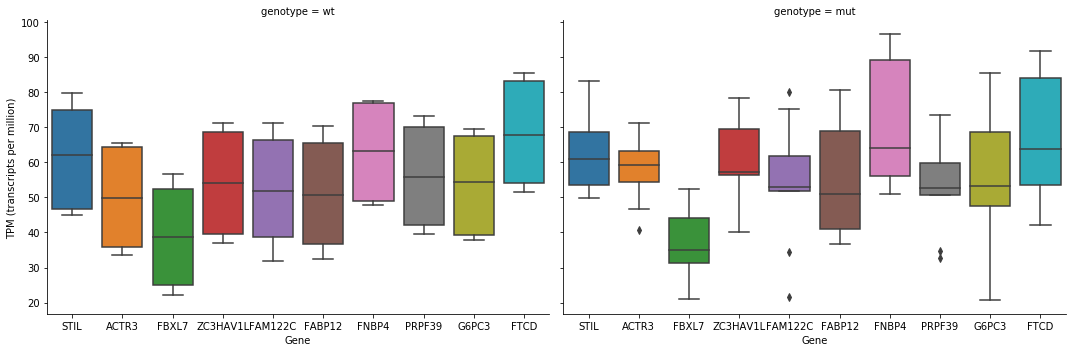

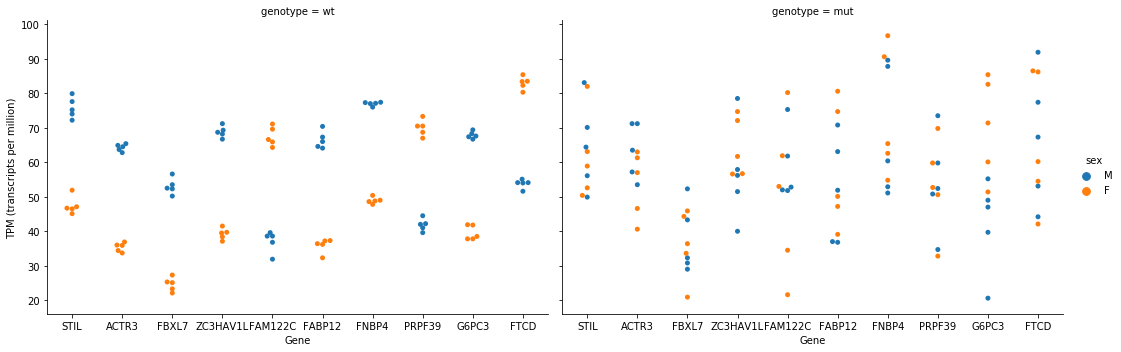

In [12]:
# Get the gene names as a list
gene_names = list(data.columns)
gene_names = gene_names[3:]

# Function to create box plots and swarm plots for n randomly selected genes
def plot_n_rand_genes(n, genes, longform_data):
    """A non-general function to plot boxplots and scatter plots for a random selection of n genes from a longform 
    pandas dataframe with columns 'gene', 'TPM', 'genotype', and 'sex' given the dataframe longform_data and gene
    names genes"""
    # Randomly select the genes to be plotted
    selected_genes = random.sample(genes, n)
    plot_data = longform_data.loc[longform_data["gene"].isin(selected_genes)]
    
    # Create box and swarm plots for the data
    g = sns.catplot(x="gene", y="TPM", col="genotype", data=plot_data, kind="box", height=5, aspect=1.5)
    g.set_axis_labels("Gene", "TPM (transcripts per million)")
    g = sns.catplot(x="gene", y="TPM", col="genotype", hue="sex", data=plot_data, kind="swarm", height=5, aspect=1.5)
    g.set_axis_labels("Gene", "TPM (transcripts per million)")
    
    return None

plot_n_rand_genes(10, gene_names, long_data)

Plotted above are box (top) and swarm (bottom) plots for the expression levels in TPM for ten random genes in both the wild type sandmouse (left) and the corriander knock-out mutant sandmouse (right). For the swarm plots, the color of the dots indicates the sex of the subject. There are ten test subjects for both the wild type and mutant mice. As we saw in the figure from Lestrade's paper, the box plots do not seem to indicate a difference in gene expression levels between the wild type and mutant sandmice. However, looking at the swarm plots on the bottom, there is a clear difference in the expression levels. In the wild type sandmice, the expression levels of each gene have two clusters, clearly clustered by sex. In the mutant sandmice, however, there is much more variability in gene expression levels both accross and within the sexes. Clearly, the expression of these genes is not the same in the wild type and mutant sand mice.

Now, let's take a look at the 5 genes origionally shown in Lestrade's paper, arugula, coriander, cayenne, juniper, and yam, by plotting the same plot as above but for these 5 genes. 

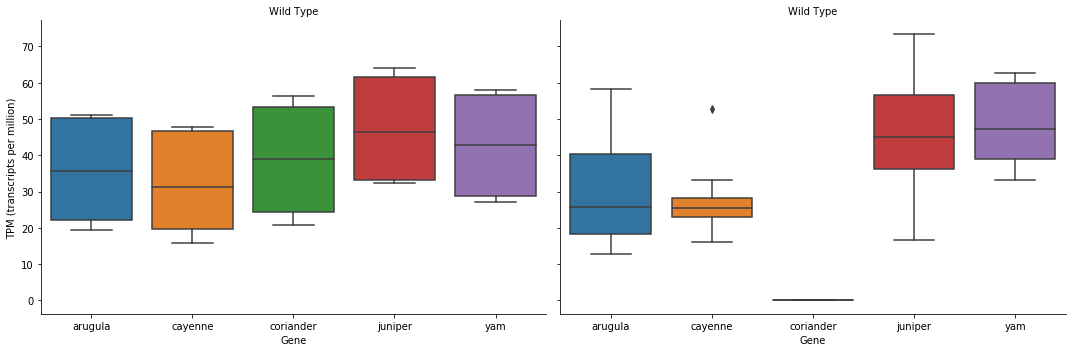

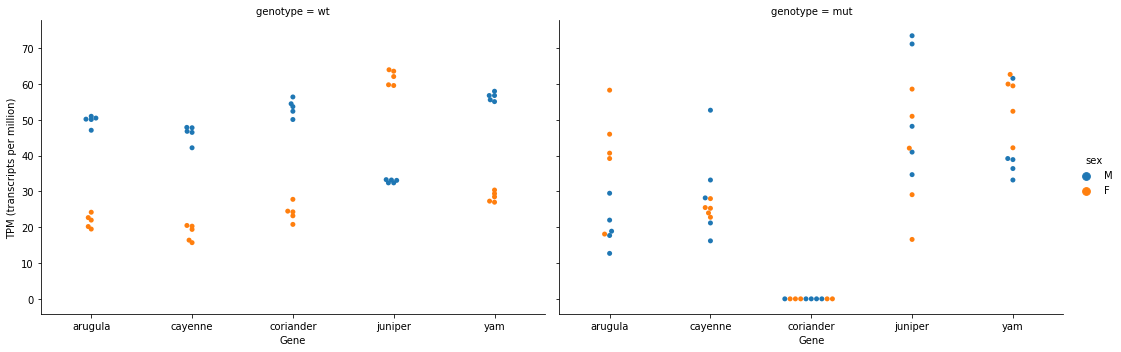

In [13]:
coriander_genes = ["arugula", "coriander", "cayenne", "juniper", "yam"]
coriander_data = long_data.loc[long_data["gene"].isin(coriander_genes)]

g = sns.catplot(x="gene", y="TPM", col="genotype", data=coriander_data, kind="box", height=5, aspect=1.5)
g.set_axis_labels("Gene", "TPM (transcripts per million)")
g.set_titles("Wild Type")
g = sns.catplot(x="gene", y="TPM", col="genotype", hue="sex", data=coriander_data, kind="swarm", height=5, aspect=1.5)
g.set_axis_labels("Gene", "TPM (transcripts per million)")
plt.show()

Indeed we see that these 5 genes (except for Coriander, which is completely absent in the mutant mice as expected) show distinct sex-based grouping in expression level in wild type mice, but comparitvly massive variation in the mutant mice. 

## Part 6: Conclusions

Based on the plots above, it is clear that the absence in the Coriander gene causes a change in the expression level of other genes in the mutant mice when compared to the wild type mice. I would hypothesize that the expression level of Coriander differs between male and female sand mice, and that expression level mediates the expression level of other genes. In the absence of Coriander gene expression, as is the case in the mutant sand mice, it appears that the expression of other genes is much less tightly regulated, both within and across sexes. Therefore, it does appear to me that the Coriander gene has an effect on the expression levels of other genes in the sand mouse. 